In [1]:
from transient_solid_earth.solid_earth_full_numerical_model import SolidEarthFullNumericalModel
from transient_solid_earth.solid_earth_time_dependent_numerical_model import (
    SolidEarthTimeDependentNumericalModel,
)

In [2]:
solid_earth_full_numerical_model = SolidEarthFullNumericalModel()

In [3]:
import numpy
  
solid_earth_time_dependent_numerical_model = SolidEarthTimeDependentNumericalModel(
    solid_earth_full_numerical_model=solid_earth_full_numerical_model, period=numpy.inf, n=2
)

In [4]:
solid_earth_time_dependent_numerical_model.integrate_y_i_systems()

array([-0.99154583+0.j,  0.02332932+0.j, -0.30543998+0.j,  0.06045288+0.j,
        0.31699406+0.j,  0.0837822 +0.j,  0.60225503+0.j,  0.08378219+0.j,
        0.29681505+0.j])

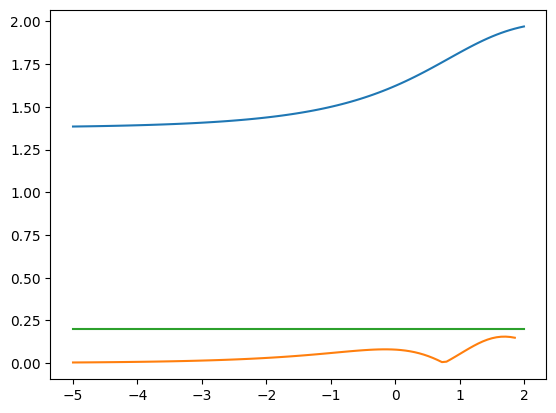

In [15]:
import numpy
from matplotlib.pyplot import plot

sigmoid = lambda x: 1.0 / (1 + numpy.exp(-x))
alpha = 1
beta = 1
gamma = 1
x_0 = 0.5
t = numpy.linspace(start=-5, stop=2, num=100)
fun = lambda t: numpy.transpose([alpha + beta * sigmoid(x=gamma*(2**t - x_0))])

f = numpy.array(object=fun(t))
dt = numpy.diff(a=t)
dt_tab = numpy.expand_dims(a=dt, axis=1)
df = numpy.diff(a=f, axis=0)
d2f = numpy.diff(a=df, axis=0)
normalized_curvature = abs(
    (d2f * numpy.expand_dims(a=f[0] - f[-1], axis=0))
    / (
        dt_tab[:-1]  # Matches the number of elements in d2f.
        * numpy.max(a=(df / dt_tab) ** 2.0)
    )
)

plot(t, fun(t))
plot(t[:-2], normalized_curvature)
plot([-5, 2], [0.2, 0.2])